In [1]:
#importing required libraries
import matplotlib as plt
import pandas as pd

#reading the .csv and loading it into the dataframe
data = pd.read_csv('./Copy of Table_08_Air_Pax_by_Type_and_Nat_of_Op(3).csv')

data.head()

,rundate,reporting_period,reporting_airport_group_name,reporting_airport_name,total_pax,pax_terminal_scheduled_UK,pax_transit_scheduled_UK,pax_terminal_scheduled_foreign_EU,pax_transit_scheduled_foreign_EU,pax_terminal_scheduled_foreign_non_EU,pax_transit_scheduled_foreign_non_EU,pax_terminal_charter_UK,pax_transit_charter_UK,pax_terminal_charter_foreign_EU,pax_transit_charter_foreign_EU,pax_terminal_charter_foreign_non_EU,pax_transit_charter_foreign_non_EU
0,12/03/2019 14:40,12/04/2019 14:40,Other UK Airports,BELFAST INTERNATIONAL,405935,317825,0,78763,0,0,0,9052,0,295,0,0,0
1,12/03/2019 14:40,201901,Other UK Airports,BIRMINGHAM,781258,263931,0,336264,0,121819,51,56985,0,2208,0,0,0
2,12/03/2019 14:40,201901,Other UK Airports,BRISTOL,520854,328895,427,150611,0,0,0,35378,0,5543,0,0,0
3,12/03/2019 14:40,201901,Other UK Airports,EDINBURGH,920098,509602,391,347991,0,47818,226,12833,0,1237,0,0,0
4,12/03/2019 14:40,201901,London Area Airports,GATWICK,2953515,1982446,0,531007,0,276756,0,155688,0,7425,0,193,0


In [2]:
#Eliminating unnecessary columns
data = data.drop(["rundate","reporting_period", "pax_transit_scheduled_UK", "pax_transit_scheduled_foreign_EU","pax_transit_scheduled_foreign_non_EU", "pax_transit_charter_UK", "pax_transit_charter_foreign_EU","pax_transit_charter_foreign_non_EU"], axis=1)
#Displaying data
data.tail()

,reporting_airport_group_name,reporting_airport_name,total_pax,pax_terminal_scheduled_UK,pax_terminal_scheduled_foreign_EU,pax_terminal_scheduled_foreign_non_EU,pax_terminal_charter_UK,pax_terminal_charter_foreign_EU,pax_terminal_charter_foreign_non_EU
5,Other UK Airports,GLASGOW,526761,382025,85209,44823,13957,0,0
6,London Area Airports,HEATHROW,5928655,2995384,847634,2083058,662,487,0
7,London Area Airports,LUTON,1156359,610775,534278,3131,6891,1284,0
8,Other UK Airports,MANCHESTER,1784815,771325,572137,317952,116944,3441,845
9,London Area Airports,STANSTED,1930066,234498,1603440,75731,15746,651,0


In [3]:
#Changing columns name
data.rename(columns={'reporting_airport_name':'airport', 'pax_terminal_scheduled_UK':'Scheduled UK pax', 'pax_terminal_scheduled_foreign_EU':'Scheduled EU pax',
       'pax_terminal_charter_UK':'Charter UK pax',
        'pax_terminal_charter_foreign_EU':'Charter EU pax',
       'pax_terminal_charter_foreign_non_EU': 'Charter NON-EU pax','pax_terminal_scheduled_foreign_non_EU':'Scheduled NON-EU pax'}, inplace=True)
print(data.columns)
data.dropna(inplace = True) 

Index(['reporting_airport_group_name', 'airport', 'total_pax',
       'Scheduled UK pax', 'Scheduled EU pax', 'Scheduled NON-EU pax',
       'Charter UK pax', 'Charter EU pax', 'Charter NON-EU pax'],
      dtype='object')


In [4]:
data['airport'] = data['airport'].astype('category')
data['reporting_airport_group_name'] = data['reporting_airport_group_name'].astype('category')


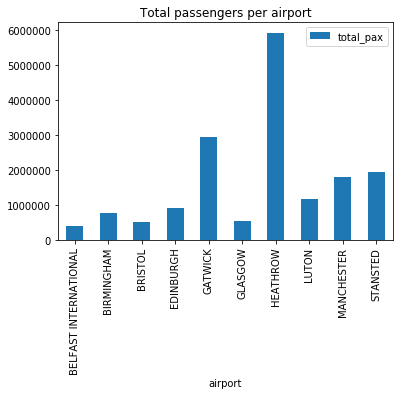

In [16]:
data.plot.bar(x='airport',y='total_pax', title='Total passengers per airport')